In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load the data
housedata = pd.read_csv("https://raw.githubusercontent.com/radadiyamohit81/data-science/Team-DSC01/data/house_dataset.csv")

In [3]:
housedata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Independent variables:
* **CRIM:** per capita crime rate by town.
* **ZN:** proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS:** proportion of non-retail business acres per town.
* **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* **NOX:** nitric oxides concentration (parts per 10 million).
* **RM:** average number of rooms per dwelling.
* **AGE:** proportion of owner-occupied units built prior to 1940.
* **DIS:** weighted distances to five Boston employment centres.
* **RAD:** index of accessibility to radial highways.
* **TAX:** full-value property-tax rate per USD 10,000.
* **PTRATIO:** pupil-teacher ratio by town.
* **B:** proportion of blacks by town.
* **LSTAT:** percentage of lower status of the population.

Target/Dependent variable:
* **MEDV:** median value of owner-occupied homes in USD 1000’s.

In [4]:
# drop column B
housedata.drop(['B'], axis=1, inplace=True)

# **EDA**

In [5]:
housedata.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    486 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


Our dataset has null values which we will process it later.

In [7]:
# Perform Data Exploration like minimum, maximum, mean, median, and standard deviation of 'MEDV'.
print("Mean:", housedata['MEDV'].mean()) # If the method is applied on a pandas series object, then the method returns a scalar value which is the mean value of all the observations in the dataframe.
print("Minimum:", housedata['MEDV'].min()) # gives the minimum value that exists in the column MEDV
print("Maximum:", housedata['MEDV'].max()) # gives the maximum value that exists in the column MEDV
print("Median:", housedata['MEDV'].median()) # If the method is applied on a pandas series object, then the method returns a scalar value which is the median value of all the observations in the dataframe
print("Standard Deviation:", housedata['MEDV'].std()) # It is a measure that is used to quantify the amount of variation or dispersion of a set of data values

Mean: 22.532806324110698
Minimum: 5.0
Maximum: 50.0
Median: 21.2
Standard Deviation: 9.19710408737982


In [8]:
# Find the correlation between variables.
housedatacorr = housedata.corr()
housedatacorr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,0.536110,-0.468536


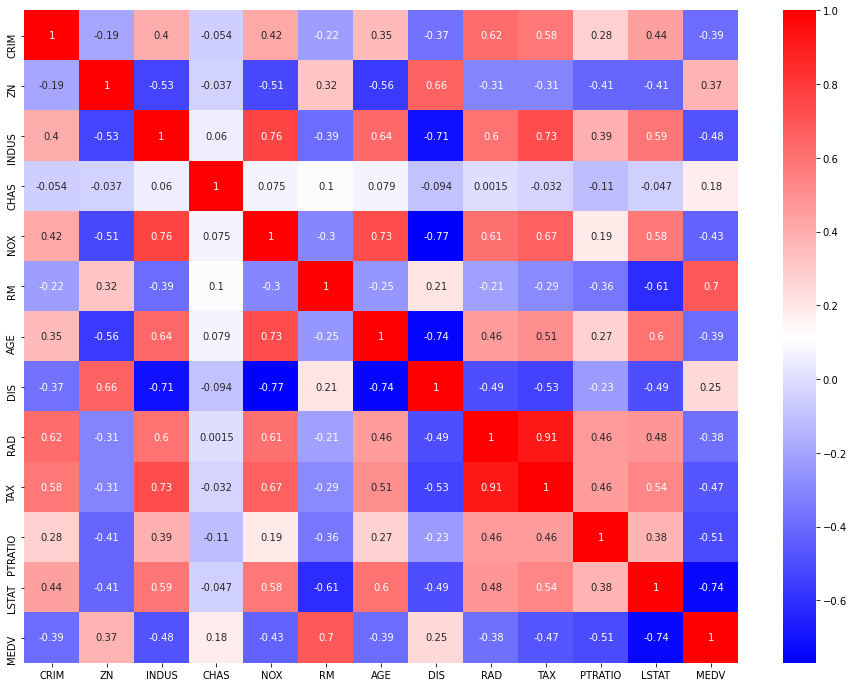

In [9]:
plt.figure(figsize=(16, 12))
sns.heatmap(housedata.corr(), cmap='bwr', annot=True)

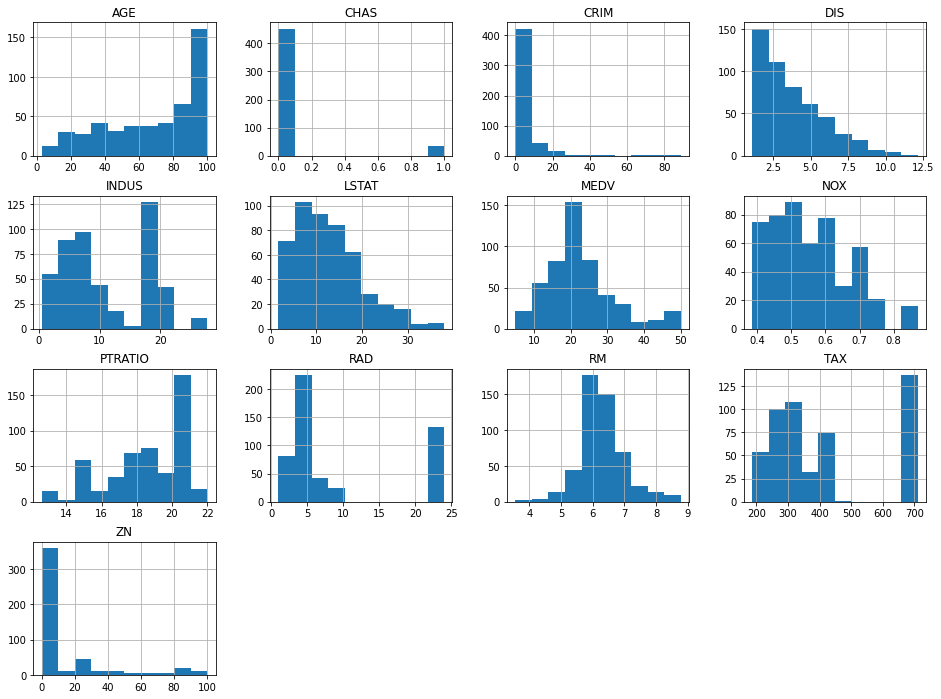

In [10]:
housedata.hist(figsize=(16, 12))
plt.show()

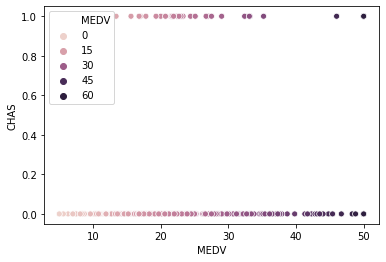

In [11]:
sns.scatterplot(housedata['MEDV'], housedata['CHAS'], hue=housedata['MEDV'])

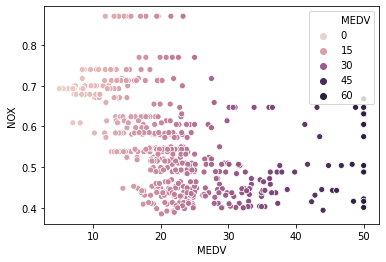

In [12]:
sns.scatterplot(housedata['MEDV'], housedata['NOX'], hue=housedata['MEDV'])

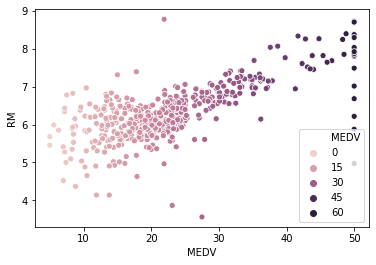

In [13]:
sns.scatterplot(housedata['MEDV'], housedata['RM'], hue=housedata['MEDV'])

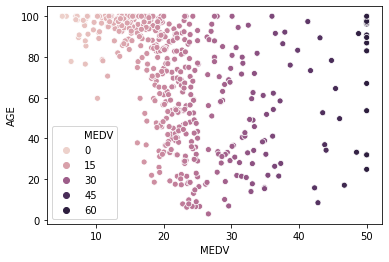

In [14]:
sns.scatterplot(housedata['MEDV'], housedata['AGE'], hue=housedata['MEDV'])

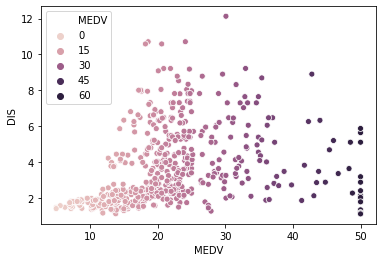

In [15]:
sns.scatterplot(housedata['MEDV'], housedata['DIS'], hue=housedata['MEDV'])

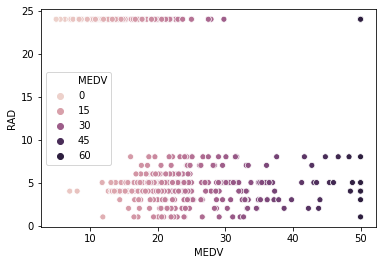

In [16]:
sns.scatterplot(housedata['MEDV'], housedata['RAD'], hue=housedata['MEDV'])

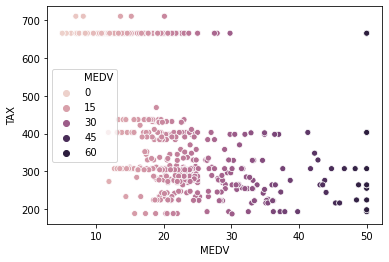

In [17]:
sns.scatterplot(housedata['MEDV'], housedata['TAX'], hue=housedata['MEDV'])

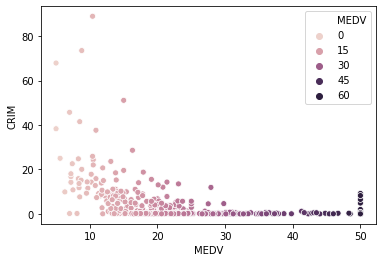

In [18]:
sns.scatterplot(housedata['MEDV'], housedata['CRIM'], hue=housedata['MEDV'])

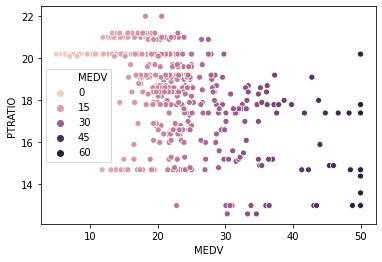

In [19]:
sns.scatterplot(housedata['MEDV'], housedata['PTRATIO'], hue=housedata['MEDV'])

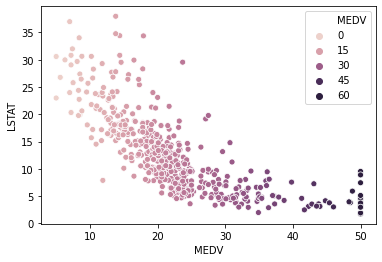

In [20]:
sns.scatterplot(housedata['MEDV'], housedata['LSTAT'], hue=housedata['MEDV'])

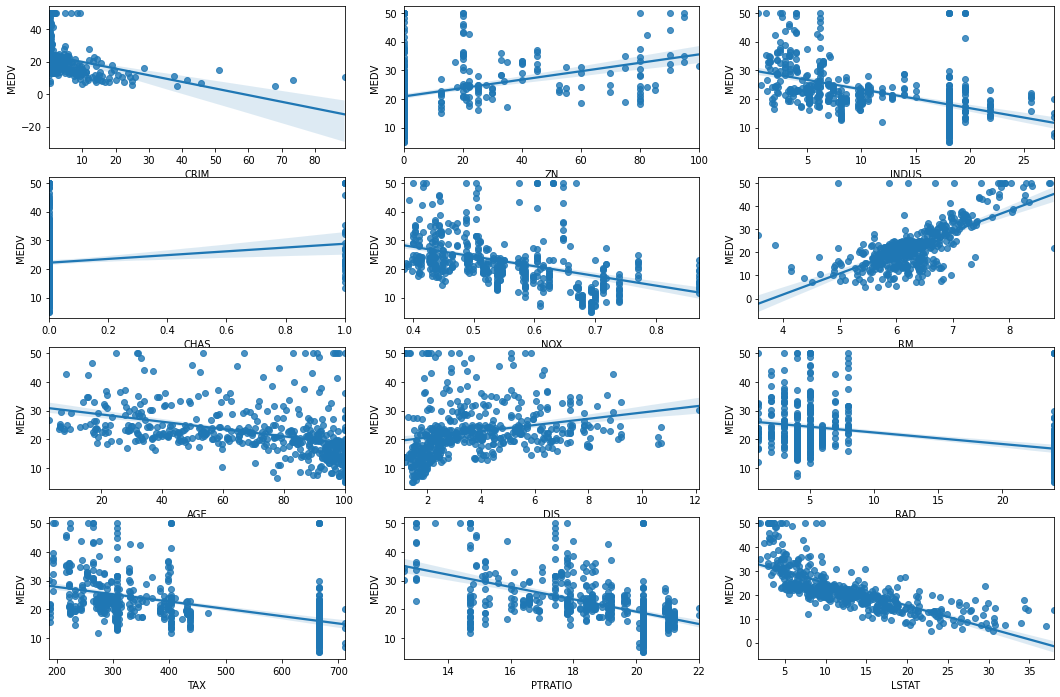

In [21]:
# Plot a regression plot graph using regplot from seaborn library
fig, ax = plt.subplots(round(len(housedata.columns) / 3), 3, figsize = (18, 12))
for i, ax in enumerate(fig.axes):
    if i < len(housedata.columns) - 1:
        sns.regplot(x=housedata.columns[i],y=housedata['MEDV'],data=housedata[housedata.columns], ax=ax)

# **Preprocessing**

In [22]:
# Preprocess the dataset as if contains the null value in dataset.
# Check if there's any null values in the dataset.
housedata.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

In [23]:
# Fill the null values with mode() value.
housedata['CRIM'].fillna(housedata['CRIM'].mode()[0], inplace=True)
housedata['ZN'].fillna(housedata['ZN'].mode()[0], inplace=True)
housedata['INDUS'].fillna(housedata['INDUS'].mode()[0], inplace=True)
housedata['CHAS'].fillna(housedata['CHAS'].mode()[0], inplace=True)
housedata['AGE'].fillna(housedata['AGE'].mode()[0], inplace=True)
housedata['LSTAT'].fillna(housedata['LSTAT'].mode()[0], inplace=True)

In [24]:
housedata.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

# **Split into train and test data**

In [25]:
X = housedata.drop(['MEDV'], axis=1)
y = housedata['MEDV']

In [26]:
from sklearn.model_selection import train_test_split

# Train the model with train data and test the model with test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

 Developing a model: in which you need to perform Linear Regression model.

In [27]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [28]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
pred1 = linreg.predict(X_test)
pred1

array([32.40219502, 28.01053562, 18.0431742 , 21.41098819, 16.96457911,
       19.45173229, 32.86930389, 17.59348241, 25.25768127, 26.78107112,
       26.153742  , 29.13191071, 20.8182506 , 26.86941999, 22.69854867,
       22.11238319, 25.22511457, 38.64039859, 30.49027155,  8.21737729,
       20.01518229, 16.73560485, 24.66071371, 24.57880808, 31.43402753,
       12.90405196, 14.91127854, 16.49083246, 36.10486403, 13.51693542,
       21.26951172, 13.90790036, 43.88765933, 16.97648634, 21.96654863,
       20.61573499, 17.34971709, 26.6371321 ,  7.79702548, 19.00622244,
       24.62475552, 20.85165838, 28.85556884, 16.74433725, 18.60069495,
       17.15074913, 39.82985073, 18.60581361, 25.94382024, 22.43433798,
       27.38654974, 24.4280523 , 24.50111315, 26.48420065,  5.54547069,
       23.42383523, 11.40693447, 26.28997178, 16.6308275 , 35.84317397,
       19.02918039, 27.30669571, 15.61981223, 21.60971804, 12.86618616,
       32.13986263, 36.76900316, 21.80108519, 24.21720139, 24.06

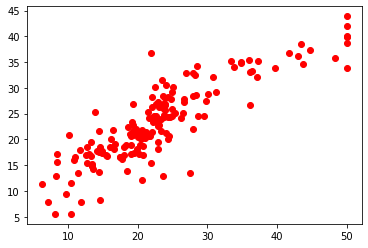

In [30]:
plt.scatter(y_test, pred1, c='red')

In [31]:
# Model Evaluation: you need to perform RMSE(Root mean squared error), R2 score.
from sklearn.metrics import mean_squared_error
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred1)))

RMSE: 4.748239920955717
